<a href="https://colab.research.google.com/github/Damneetsingh01/Week-6.1_Super_store_sales-EDA-/blob/main/Super_Store_Sales(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Exploratory Data Analysis**

### **Task 1: SuperStoreSales (EDA)**

* Importing The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

* Loading The Dataset

In [ ]:
data = pd.read_csv("/content/train.csv")

* Creating A Copy

In [ ]:
c_df = data.copy()

* First 5 Values of Dataset

In [ ]:
c_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


* Last Values of Dataset

In [ ]:
c_df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


* Total Columns in Dataset

In [ ]:
c_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

* Converting  the columns of the dataset to lowercase and replacing the spaces with underscore

In [ ]:
c_df.columns = c_df.columns.str.lower()
c_df.columns = c_df.columns.str.replace(' ','_')

* Total Null Values in The dataset

In [ ]:
c_df.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64

* Info About the Dataset

In [ ]:
c_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9800 non-null   int64  
 1   order_id       9800 non-null   object 
 2   order_date     9800 non-null   object 
 3   ship_date      9800 non-null   object 
 4   ship_mode      9800 non-null   object 
 5   customer_id    9800 non-null   object 
 6   customer_name  9800 non-null   object 
 7   segment        9800 non-null   object 
 8   country        9800 non-null   object 
 9   city           9800 non-null   object 
 10  state          9800 non-null   object 
 11  postal_code    9789 non-null   float64
 12  region         9800 non-null   object 
 13  product_id     9800 non-null   object 
 14  category       9800 non-null   object 
 15  sub-category   9800 non-null   object 
 16  product_name   9800 non-null   object 
 17  sales          9800 non-null   float64
dtypes: float

* Shape Of Dataset

In [ ]:
c_df.shape

(9800, 18)

#   **Data Cleaning**

* Names of the state with empty postal code

In [ ]:
empty_postal = c_df.loc[c_df['postal_code'].isnull(), 'state'].unique()

print("States with empty postal codes:",empty_postal)

States with empty postal codes: ['Vermont']


* Filling the postal code for Vermont with '05001' (From Internet)

In [ ]:
c_df['postal_code'].fillna(05401.0, inplace=True)

c_df['postal_code'] = c_df['postal_code'].astype(int)


* Checking The Null Values

In [ ]:
c_df.isna().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
dtype: int64

* Sample from The Data

In [ ]:
c_df.sample()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29


* Getting the unique values present in ship_mode column

In [ ]:
c_df['ship_mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

* Mapping the ship_mode values as

1.  'Standard Class': 0,
2.  'First Class': 1,
3.  'Second Class': 2,
4.  'Same Day': 4











In [ ]:
mapping = {'Standard Class': 0, 'First Class': 1, 'Second Class': 2, 'Same Day': 4}

c_df['ship_mode'] = c_df['ship_mode'].replace(mapping)

c_df['ship_mode'] =c_df['ship_mode'].astype(int)

* Converting the date columns to 'datetime' datatype

In [ ]:
date_column = ['order_date','ship_date']

c_df[date_column]=c_df[date_column].apply(lambda col: pd.to_datetime(col, format='%d/%m/%Y', errors='coerce'))

c_df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                 int64
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
dtype: object

* Description Of Dataset

In [ ]:
c_df['sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: sales, dtype: float64

* Knowing the Quantity of the items sold from order_id

In [ ]:
order_quantity = c_df.groupby('order_id')['row_id'].count().reset_index()
order_quantity.rename(columns={'row_id': 'quantity'}, inplace=True)

# Merging the order_quantity with the original DataFrame to include 'quantity' information
merged = pd.merge(c_df, order_quantity, on='order_id')

# Now, 'quantity' column represents the number of products in each order
print(merged[['order_id', 'quantity']])


            order_id  quantity
0     CA-2017-152156         2
1     CA-2017-152156         2
2     CA-2017-138688         1
3     US-2016-108966         2
4     US-2016-108966         2
...              ...       ...
9795  CA-2017-125920         1
9796  CA-2016-128608         4
9797  CA-2016-128608         4
9798  CA-2016-128608         4
9799  CA-2016-128608         4

[9800 rows x 2 columns]


In [ ]:
c_df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

#**Data Visualization**





* Visualizing grouped bar chart for region-wise product sale

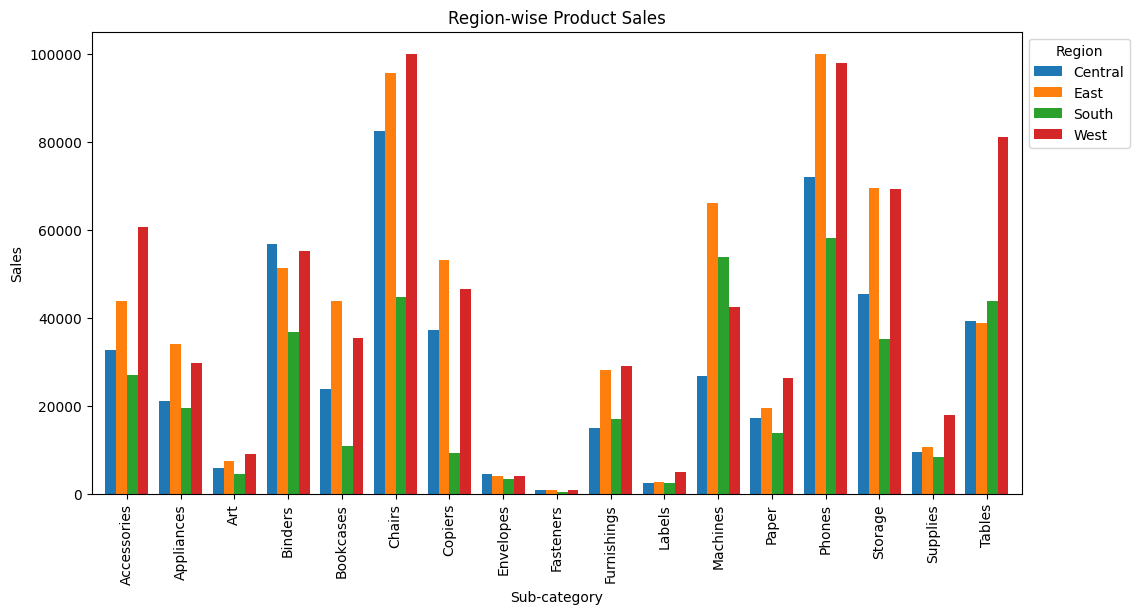

In [ ]:
# Creating a pivot table to get region-wise product sales
pivot = pd.pivot_table(c_df, values='sales', index='sub-category', columns='region', aggfunc=np.sum, fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
pivot.plot(kind='bar', ax=ax, width=0.8)
plt.title('Region-wise Product Sales')
plt.xlabel('Sub-category')
plt.ylabel('Sales')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()



* Visualizing bar chart for quantity sold across different customer segments

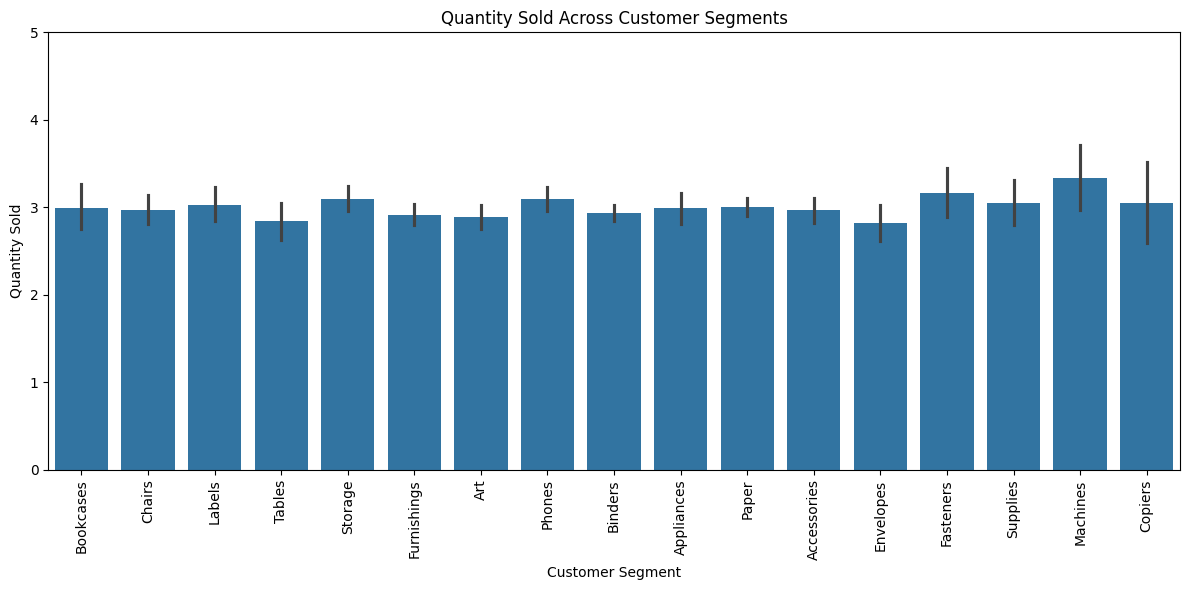

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=c_df['sub-category'], y=merged['quantity'])
plt.title('Quantity Sold Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Quantity Sold')
plt.ylim(0, 5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Visualizing bar chart for product-wise sales

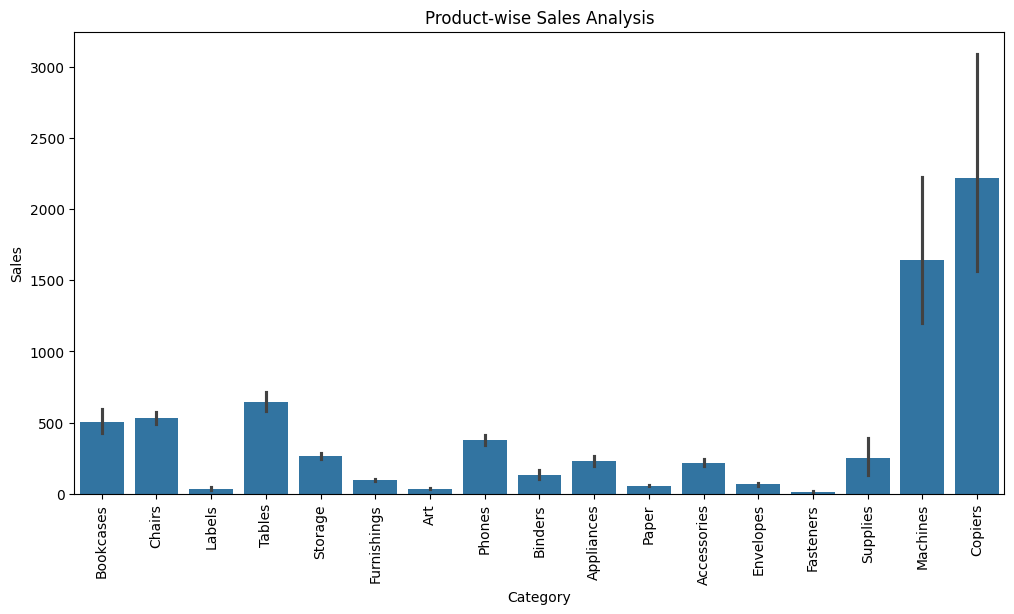

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sub-category', y='sales', data=c_df)
plt.title('Product-wise Sales Analysis')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

* Visualizing bar chart for total sales across different customer segments

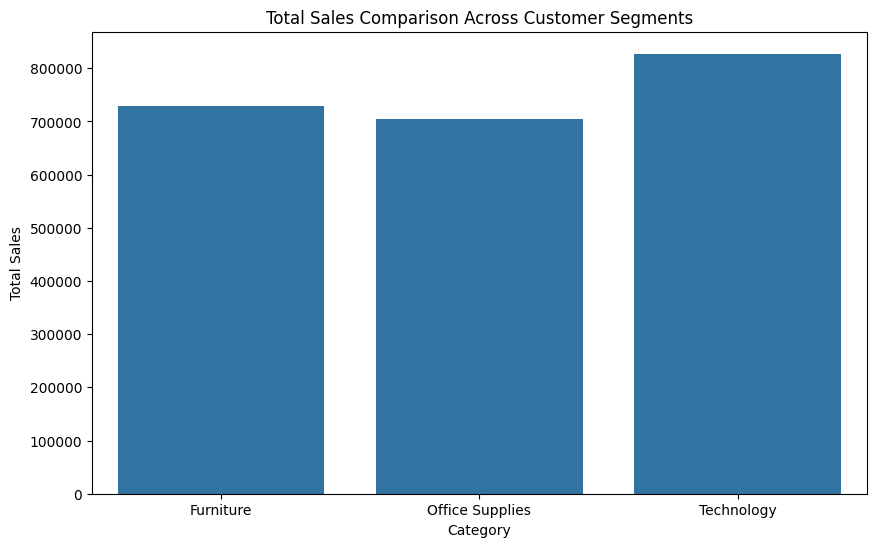

In [ ]:
agg_customer_sales = c_df.groupby('category')['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='sales', data=agg_customer_sales)
plt.title('Total Sales Comparison Across Customer Segments')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

* Visualizing stacked bar chart for sales across different regions and categories

<Figure size 1200x800 with 0 Axes>

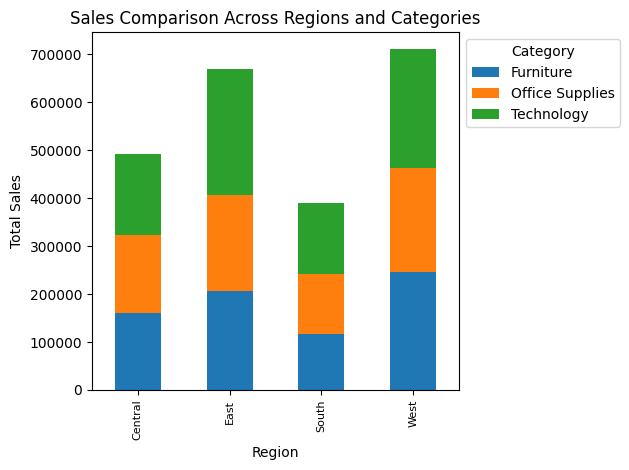

In [ ]:
region_category_sales = c_df[['region', 'category', 'sales']]

pivot = region_category_sales.pivot_table(index='region', columns='category', values='sales', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
pivot.plot(kind='bar', stacked=True)
plt.title('Sales Comparison Across Regions and Categories')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



*   Histogram for Sales
*   Histogram for sub-category



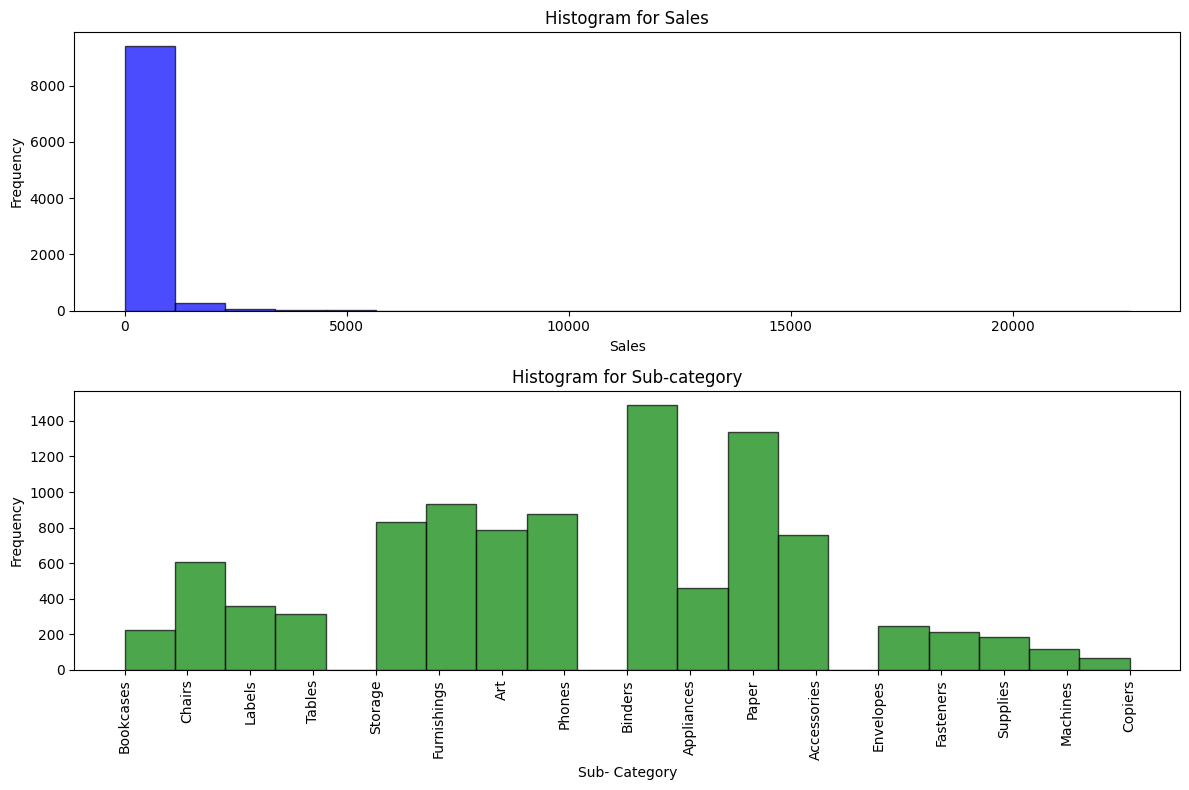

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.hist(c_df['sales'], bins=20, edgecolor='black', alpha=0.7, color='blue')
plt.title('Histogram for Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(c_df['sub-category'], bins=20, edgecolor='black', alpha=0.7, color='green')
plt.title('Histogram for Sub-category')
plt.xlabel('Sub- Category')
plt.xticks(rotation=90)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* Visualizing a time-series plot for sales over the past 4 year

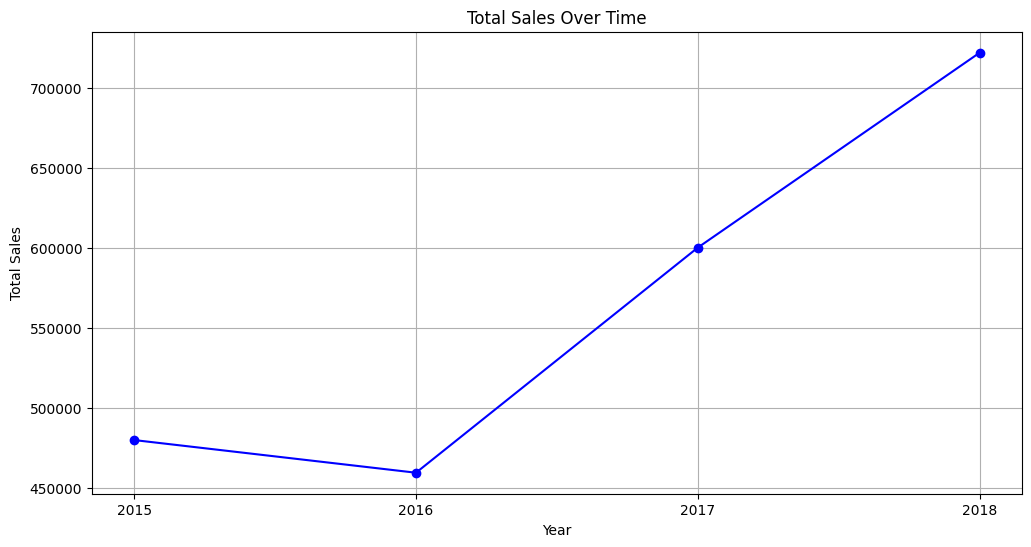

In [ ]:
c_df['order_year'] = c_df['order_date'].dt.year

# Group by 'order_year' and calculate the total sales for each year
yearly_sales = c_df.groupby('order_year')['sales'].sum().reset_index()

# Plotting a time series plot for total sales per year
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['order_year'], yearly_sales['sales'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(yearly_sales['order_year'].astype(int))
plt.show()

### Visualizing
* Monthly Sales
* Quarterly Sales
* Yearly Sales

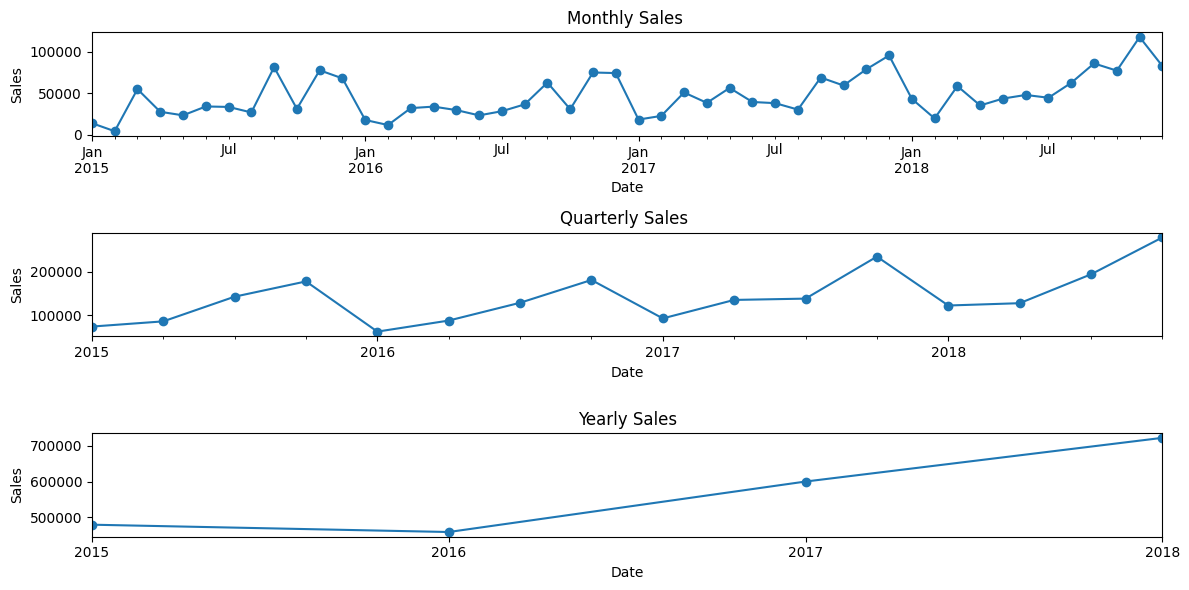

In [ ]:
# Setting 'order_date' as the index
c_df.set_index('order_date', inplace=True)

# Resampling data for different time periods
monthly_sales = c_df['sales'].resample('M').sum()
quarterly_sales = c_df['sales'].resample('Q').sum()
yearly_sales = c_df['sales'].resample('Y').sum()

# Plotting line charts for sales variation over time
plt.figure(figsize=(12, 6))

# Monthly sales
plt.subplot(3, 1, 1)
monthly_sales.plot(marker='o')
plt.title('Monthly Sales ')
plt.xlabel('Date')
plt.ylabel('Sales')

# Quarterly sales
plt.subplot(3, 1, 2)
quarterly_sales.plot(marker='o')
plt.title('Quarterly Sales ')
plt.xlabel('Date')
plt.ylabel('Sales')

# Yearly sales
plt.subplot(3, 1, 3)
yearly_sales.plot(marker='o')
plt.title('Yearly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

# Resetting the index to bring 'order_date' back as a column
c_df.reset_index(inplace=True)

* Visualizing the Box Plot of Sales

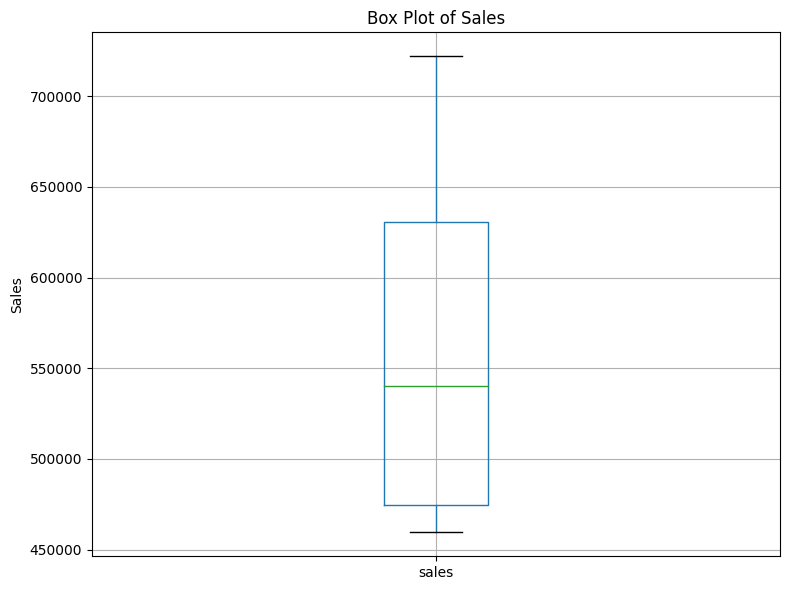

In [ ]:
yearly_sales_df = yearly_sales.to_frame()

plt.figure(figsize=(8, 6))
yearly_sales_df.boxplot(column='sales')
plt.title('Box Plot of Sales')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

* Visualizing Correlation Matrix

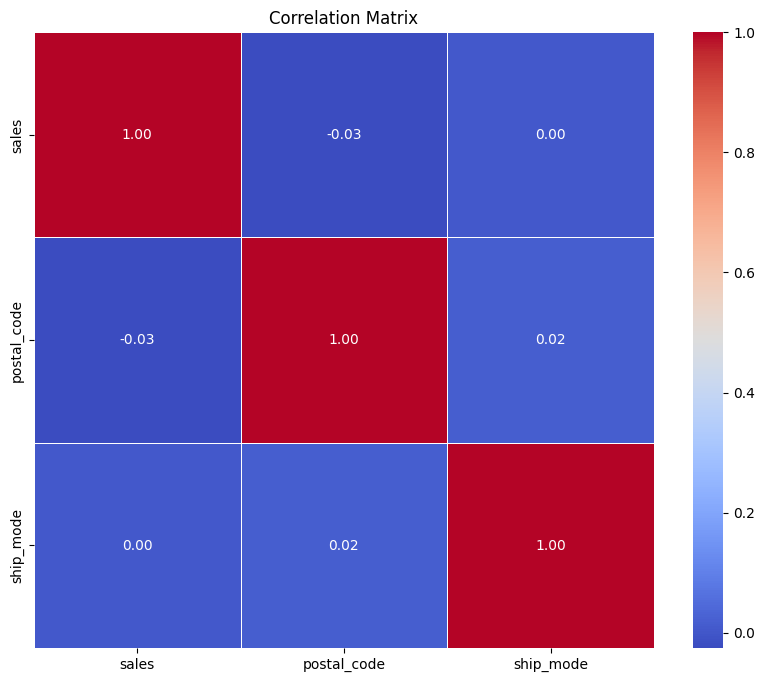

In [ ]:
numeric = ['sales', 'postal_code', 'ship_mode']

correlation_matrix = c_df[numeric].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* Visualizing Scatter Plot between ship_mode and Sales

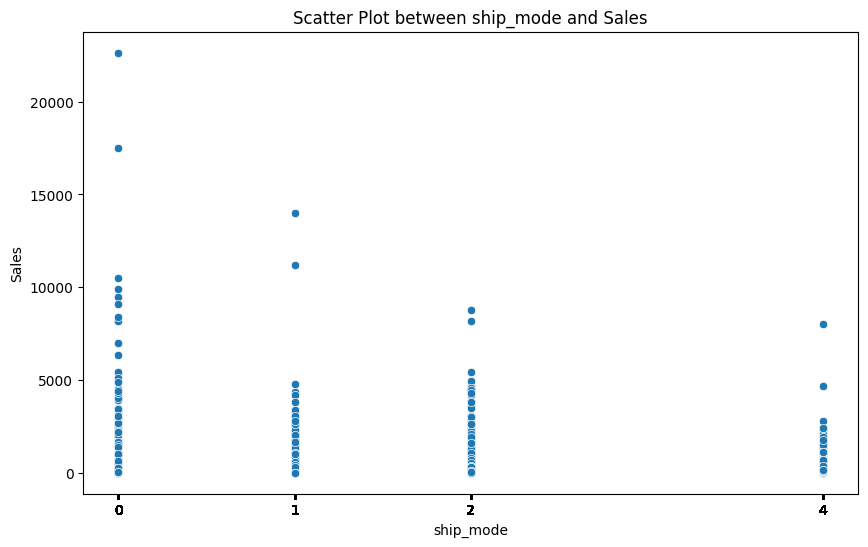

In [ ]:
numeric_to_explore = 'ship_mode'

# Plotting scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=c_df[numeric_to_explore], y=c_df['sales'])
plt.title(f'Scatter Plot between {numeric_to_explore} and Sales')
plt.xlabel(numeric_to_explore)
plt.ylabel('Sales')
plt.xticks(c_df['ship_mode'].astype(int))
plt.show()

* Visualizing Pair Plots for Numeric Variables

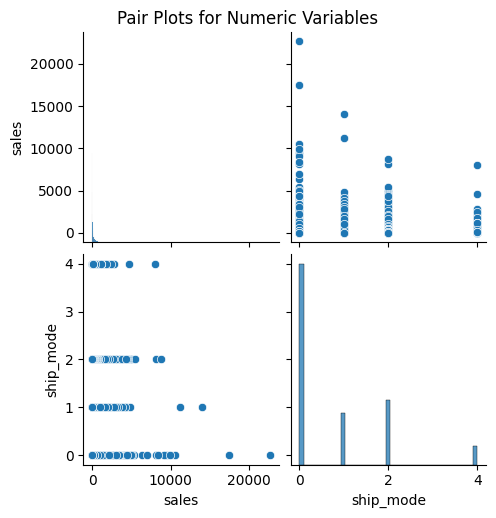

In [ ]:
numeric_for_pairplot = ['sales', 'ship_mode']

sns.pairplot(c_df[numeric_for_pairplot])
plt.suptitle('Pair Plots for Numeric Variables', y=1.02)
plt.show()


* Visualizing scatter plot for the relationship between sales and quantity sold

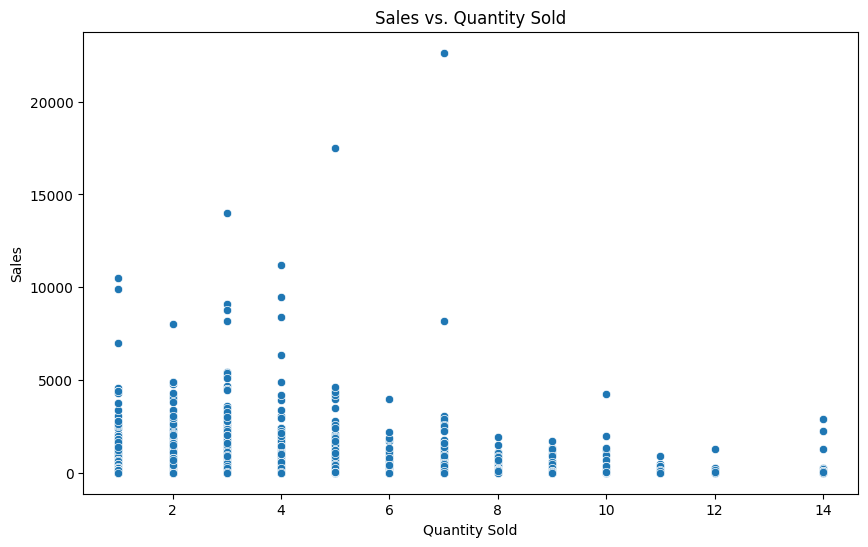

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='sales', data=merged)
plt.title('Sales vs. Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales')
plt.show()

In [ ]:
yearly_sales.head()

order_date
2015-12-31    479856.2081
2016-12-31    459436.0054
2017-12-31    600192.5500
2018-12-31    722052.0192
Freq: A-DEC, Name: sales, dtype: float64

* Performing seasonal decomposition

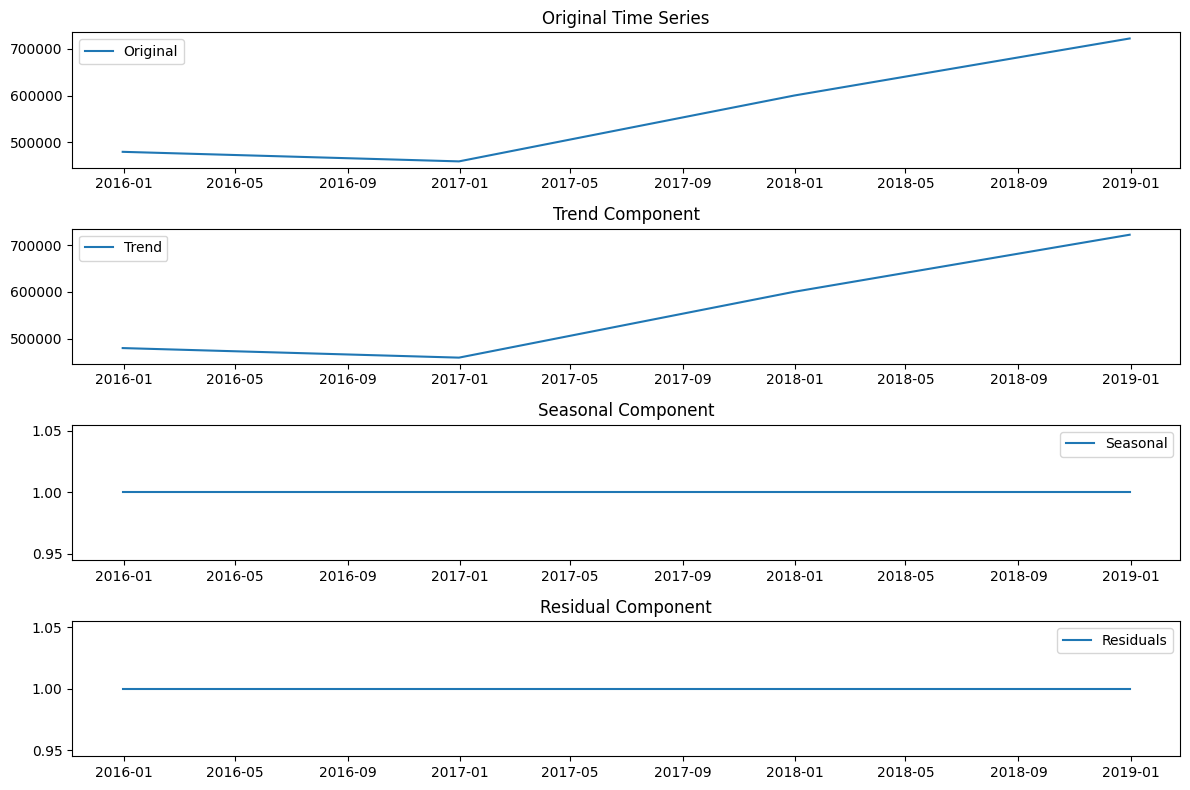

In [ ]:
result = seasonal_decompose(yearly_sales_df['sales'], model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(yearly_sales_df['sales'], label='Original')
plt.legend()
plt.title('Original Time Series')

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.title('Trend Component')

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()